In [3]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')

import string

import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec

import spacy # for a lemmatization example

from sklearn.manifold import TSNE

import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/jaejin/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jaejin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaejin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load data

In [4]:
from nltk.corpus import gutenberg

In [5]:
gberg_sents = gutenberg.sents()

In [6]:
gberg_sents[0:6]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.'],
 ['Her',
  'mother',
  'h

In [7]:
gberg_sents[4][14]

'father'

### Iterative preprocessing a sentence

#### a tokenized sentence

In [15]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

#### to lowercase

In [16]:
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

#### remove stopwords and punctuation

In [17]:
stpwrds = stopwords.words('english') + list(string.punctuation)

stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
[w.lower() for w in gberg_sents[4] if w.lower() not in stpwrds]

['youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

#### stem words

In [19]:
stemmer = PorterStemmer()

In [20]:
[stemmer.stem(w.lower()) for w in gberg_sents[4] if w.lower() not in stpwrds]

['youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

#### a lemmatization example

In [23]:
nlp = spacy.load('en_core_web_sm')

In [24]:
gutenberg.raw()[291:477]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [25]:
spacy_doc = nlp(gutenberg.raw()[291:477])

In [26]:
[w.lemma_ for w in spacy_doc]

['she',
 'be',
 'the',
 'young',
 'of',
 'the',
 'two',
 'daughter',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 '\n',
 'indulgent',
 'father',
 ';',
 'and',
 'have',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 '\n',
 'be',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

#### handle bigram (or n-gram) collocations

In [27]:
phrases = Phrases(gberg_sents)

In [28]:
bigram = Phraser(phrases)

In [29]:
bigram.phrasegrams

{'two_daughters': 11.966813731181547,
 'her_sister': 17.7960829227865,
 "'_s": 31.066242737744524,
 'very_early': 11.01214147275924,
 'Her_mother': 13.529425062715127,
 'long_ago': 63.22343628984789,
 'more_than': 29.023584433996874,
 'had_been': 22.306024648925288,
 'an_excellent': 39.063874851750626,
 'Miss_Taylor': 453.75918026073305,
 'very_fond': 24.134280468850747,
 'passed_away': 12.35053642325912,
 'too_much': 31.376002029426687,
 'did_not': 11.72841621714281,
 'any_means': 14.096964108090186,
 'wedding_-': 17.4695197740113,
 'Her_father': 13.129571562488772,
 'after_dinner': 21.528548116881705,
 'self_-': 47.79018053120332,
 'sixteen_years': 107.0461671612265,
 'five_years': 40.128755673408115,
 'years_old': 54.735425236061104,
 'seven_years': 52.59411150244507,
 'each_other': 79.4168405322873,
 'a_mile': 12.783091600264584,
 'must_be': 10.229989650632808,
 'difference_between': 220.52537305244678,
 'could_not': 10.870983286982371,
 'having_been': 11.53801833156938,
 'miles_of

In [30]:
tokenized_sentence = "Jon lives in New York City".split()

In [31]:
tokenized_sentence

['Jon', 'lives', 'in', 'New', 'York', 'City']

In [32]:
bigram[tokenized_sentence]

['Jon', 'lives', 'in', 'New_York', 'City']

### Preprocess the corpus

In [33]:
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w.lower() not in list(string.punctuation)])

In [34]:
lower_sents[0:5]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period']]

In [36]:
lower_bigram = Phraser(Phrases(lower_sents))

In [37]:
lower_bigram.phrasegrams

{'two_daughters': 11.080802900992637,
 'her_sister': 16.93971298099339,
 'very_early': 10.516998773665177,
 'her_mother': 10.70812618607742,
 'long_ago': 59.22644201533601,
 'more_than': 28.529926612065935,
 'had_been': 21.583193129694834,
 'an_excellent': 37.41859680854167,
 'sixteen_years': 131.42913000977518,
 'miss_taylor': 420.4340982546865,
 'mr_woodhouse': 104.19907841850323,
 'very_fond': 24.185726346489627,
 'passed_away': 11.751473221742694,
 'too_much': 30.363090173835406,
 'did_not': 10.846196223896685,
 'any_means': 14.294148100212627,
 'after_dinner': 18.60737125272944,
 'mr_weston': 91.63290824201266,
 'five_years': 37.66428596665674,
 'years_old': 48.59909444619029,
 'seven_years': 50.3345604292756,
 'each_other': 71.31277029783762,
 'well_informed': 14.185028016786626,
 'a_mile': 11.700110753652233,
 'difference_between': 207.86784241868986,
 'mrs_weston': 180.6778969011602,
 'could_not': 10.213333164207082,
 'having_been': 10.723750443105281,
 'sixteen_miles': 105.040

In [38]:
lower_bigram["jon lives in new york city".split()]

['jon', 'lives', 'in', 'new_york', 'city']

In [40]:
lower_bigram = Phraser(Phrases(lower_sents, min_count=32, threshold=64))
lower_bigram.phrasegrams

{'miss_taylor': 156.44059469941823,
 'mr_woodhouse': 82.04651843976633,
 'mr_weston': 75.87438262077481,
 'mrs_weston': 160.6848509325892,
 'great_deal': 93.36368125424357,
 'mr_knightley': 161.74131790625913,
 'miss_woodhouse': 229.03802722366902,
 'years_ago': 74.31594785893046,
 'mr_elton': 121.3990121932397,
 'dare_say': 89.94000515807346,
 'frank_churchill': 1316.4456593286038,
 'miss_bates': 276.3958829169252,
 'drawing_room': 84.91494947493561,
 'mrs_goddard': 143.57843432545658,
 'miss_smith': 73.03442128232508,
 'few_minutes': 204.16834974753786,
 'john_knightley': 83.03755747111268,
 'don_t': 250.30957446808512,
 'good_natured': 88.69936184891343,
 'few_moments': 107.77584531675087,
 'thousand_pounds': 166.51834523092802,
 'o_clock': 89.14789088153574,
 'jane_fairfax': 654.556591758761,
 'miss_fairfax': 196.19987447261062,
 'ma_am': 157.25846601094193,
 'mrs_elton': 93.08931456265867,
 'forty_years': 90.60220877269607,
 'cut_off': 129.60290535032792,
 'ten_thousand': 84.00099

In [41]:
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

In [42]:
clean_sents[0:9]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period'],
 ['her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',
  'an',
 

### Run word2vec

In [45]:
model = Word2Vec(sentences=clean_sents, vector_size=64,
                 sg=1, window=10, epochs=5,
                 min_count=10, workers=38)

model.save('clean_gutenberg_model.w2v')

### Explore model

In [46]:
model = gensim.models.Word2Vec.load('clean_gutenberg_model.w2v')

In [47]:
len(model.wv.index_to_key)

10329

In [49]:
type(model.wv)

gensim.models.keyedvectors.KeyedVectors

In [50]:
model.wv['dog']

array([-0.17382248, -0.28559858, -0.2607186 , -0.21042402, -0.04290725,
        0.22146507,  0.28929096,  0.6925949 , -0.19514096,  0.3723885 ,
       -0.04730219, -0.25290155, -0.26676774, -0.1479823 ,  0.36855417,
       -0.24025424,  0.09480161, -0.09636551, -0.597072  , -0.26600224,
        0.10264022,  0.18301126,  0.29487586, -0.00693723,  0.34859842,
       -0.12618354, -0.25669992,  0.5934409 ,  0.45229235, -0.48426723,
        0.01570921, -0.04373873, -0.02718597,  0.19996919, -0.09104253,
       -0.1452697 ,  0.30875543, -0.08178248,  0.3266288 ,  0.1708851 ,
       -0.04861975,  0.3626047 , -0.499144  , -0.15255362,  0.14527853,
       -0.07765796,  0.08304372,  0.18996371, -0.24083969,  0.37959605,
       -0.4561809 ,  0.41511053,  0.29108238,  0.03766878,  0.43313766,
        0.6471465 , -0.2562952 ,  0.42478603, -0.07063324,  0.11724741,
       -0.04719014, -0.42800733, -0.01683161, -0.3185728 ], dtype=float32)

In [51]:
len(model.wv['dog'])

64

In [52]:
model.wv.most_similar('dog', topn=3)

[('puppy', 0.7808352112770081),
 ('cage', 0.7645214796066284),
 ('fox', 0.7604595422744751)]

In [53]:
model.wv.most_similar('eat', topn=3)

[('bread', 0.8443381786346436),
 ('drink', 0.8233337998390198),
 ('meat', 0.7620530128479004)]

In [54]:
model.wv.most_similar('day', topn=3)

[('morning', 0.7843860983848572),
 ('week', 0.7632828950881958),
 ('night', 0.7399803400039673)]

In [55]:
model.wv.most_similar('father', topn=3)

[('mother', 0.853076696395874),
 ('sister', 0.7608442902565002),
 ('brother', 0.7537091970443726)]

In [56]:
model.wv.most_similar('ma_am', topn=3)

[('m_sure', 0.8655703663825989),
 ('betty', 0.8565313220024109),
 ('mamma', 0.8467332124710083)]

In [58]:
model.wv.doesnt_match('mother father sister brother dog'.split())

'dog'

In [59]:
model.wv.similarity('father', 'dog')

0.4688921

In [60]:
model.wv.most_similar(positive=['father', 'woman'], negative=['man'])                                                              

[('mother', 0.8014846444129944),
 ('sister', 0.7707806825637817),
 ('husband', 0.7432738542556763),
 ('daughter', 0.7425177097320557),
 ('wife', 0.7300193905830383),
 ('maid', 0.7053380608558655),
 ('nurse', 0.7032092809677124),
 ('daughters', 0.6833873987197876),
 ('rachel', 0.6684637665748596),
 ('maiden', 0.6654942035675049)]

In [62]:
model.wv.most_similar(positive=['husband', 'woman'], negative=['man'])

[('wife', 0.6922212839126587),
 ('maid', 0.6864210963249207),
 ('sister', 0.6854925155639648),
 ('daughter', 0.6721680164337158),
 ('mother', 0.6574140787124634),
 ('nurse', 0.6553508043289185),
 ('daughters', 0.6348058581352234),
 ('conceived', 0.6225793361663818),
 ('harlot', 0.6132533550262451),
 ('child', 0.6083549857139587)]

### Reduce word vector dimensionality with t-SNE

In [63]:
tsne = TSNE(n_components=2, n_iter=1000)

In [64]:
X_2d = tsne.fit_transform(model.wv[model.wv.index_to_key])

coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.index_to_key

In [65]:
coords_df.head()

coords_df.to_csv('clean_gutenberg_tsne.csv', index=False)

### Visualize

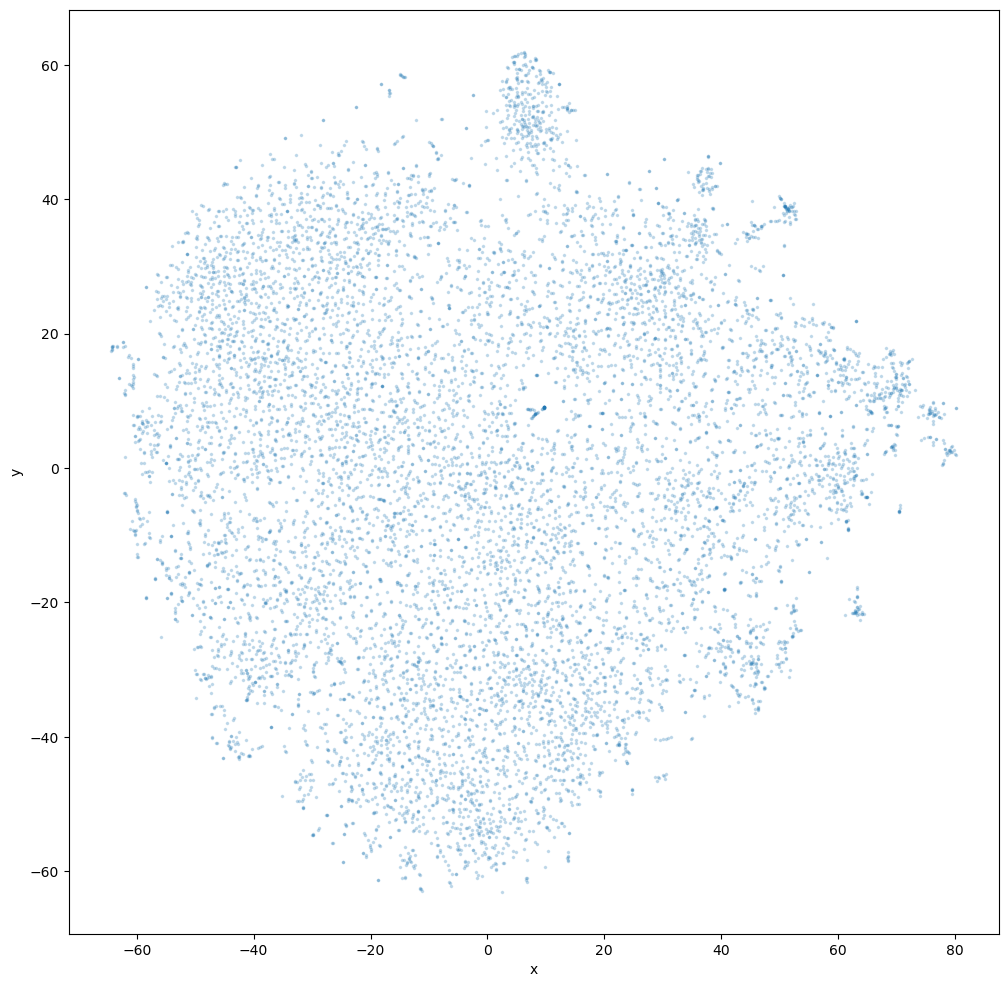

In [66]:
coords_df = pd.read_csv('clean_gutenberg_tsne.csv')

_ = coords_df.plot.scatter('x', 'y', figsize=(12,12),
                           marker='.', s=10, alpha=0.2)

In [67]:
output_notebook()

Loading BokehJS ...

In [69]:
subset_df = coords_df.sample(n=5000)

In [70]:
subset_df.head(3)

,x,y,token
10054,-0.517691,26.200720,sufficed
6479,-11.312267,-20.834475,timid
1241,0.104397,-58.227425,boats


In [71]:
p = figure(width=800, height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [72]:
show(p)